Documentação da Biblioteca Pandas:
https://pandas.pydata.org/pandas-docs/stable/index.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%autosave 60

Autosaving every 60 seconds


# Series

Uma serie para o pandas é como um array unidimensional. Toda serie possui um indice (index) que da rótulos a cada elemento da lista.
obs: Caso o index nao seja informado o pandas o adiciona automaticamente

In [3]:
notas = pd.Series([2,7,5,10,6])
notas

0     2
1     7
2     5
3    10
4     6
dtype: int64

In [4]:
#Principais atributos das Series:
notas.values

array([ 2,  7,  5, 10,  6])

In [5]:
notas.index #Por padrão o pandas usa os inteiros > 0 em ordem crescente

RangeIndex(start=0, stop=5, step=1)

In [6]:
#Atribuindo index
notas = pd.Series([2,7,5,10,6], index=["Leandro", "Milton", "Patrick", "Ana", "Jessica"])
notas

Leandro     2
Milton      7
Patrick     5
Ana        10
Jessica     6
dtype: int64

In [7]:
notas["Leandro"]

2

In [ ]:
notas

In [8]:
print("Média: ", notas.mean())
print("Desvio Padrão: ", notas.std())

Média:  6.0
Desvio Padrão:  2.9154759474226504


In [23]:
#Resumo das estatisticas dos dados
notas.describe()

count     5.000000
mean      6.000000
std       2.915476
min       2.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      10.000000
dtype: float64

In [24]:
#Pandas é flexível a ponto de suportar formulas matematicas (inclusive atraves da numpy) para apresentar os dados

notas**2

Leandro      4
Milton      49
Patrick     25
Ana        100
Jessica     36
dtype: int64

In [25]:
np.log(notas)

Leandro    0.693147
Milton     1.945910
Patrick    1.609438
Ana        2.302585
Jessica    1.791759
dtype: float64

# Data Frame

Data Frame é uma estrutura bidimensional de dados, como uma planilha.

In [27]:
#Podemos usar um dicionario como input de um data frame

df = pd.DataFrame({'Aluno' : ["Leandro", "Milton", "Patrick", "Ana", "Jessica"], 
                   'Faltas' : [3,4,2,1,4], 
                   'Prova' : [2,7,5,10,6], 
                   'Seminario' : [8.5,7.5,9.0,7.5,8.0]})
df

Aluno  Faltas  Prova  Seminario
0  Leandro       3      2        8.5
1   Milton       4      7        7.5
2  Patrick       2      5        9.0
3      Ana       1     10        7.5
4  Jessica       4      6        8.0

In [32]:
#Tipo de dado de cada coluna
df.dtypes

Aluno         object
Faltas         int64
Prova          int64
Seminario    float64
dtype: object

In [33]:
df.columns

Index(['Aluno', 'Faltas', 'Prova', 'Seminario'], dtype='object')

In [34]:
df['Seminario']

0    8.5
1    7.5
2    9.0
3    7.5
4    8.0
Name: Seminario, dtype: float64

In [36]:
#Resumo das estatisticas dos dados
df.describe()

Faltas      Prova  Seminario
count  5.00000   5.000000    5.00000
mean   2.80000   6.000000    8.10000
std    1.30384   2.915476    0.65192
min    1.00000   2.000000    7.50000
25%    2.00000   5.000000    7.50000
50%    3.00000   6.000000    8.00000
75%    4.00000   7.000000    8.50000
max    4.00000  10.000000    9.00000

In [39]:
#Ordenar o Data Frame por alguma coluna

df.sort_values(by="Seminario") #Este metodo nao modifica o Data Frame original

Aluno  Faltas  Prova  Seminario
1   Milton       4      7        7.5
3      Ana       1     10        7.5
4  Jessica       4      6        8.0
0  Leandro       3      2        8.5
2  Patrick       2      5        9.0

In [40]:
df.sort_values(by="Prova")

Aluno  Faltas  Prova  Seminario
0  Leandro       3      2        8.5
2  Patrick       2      5        9.0
4  Jessica       4      6        8.0
1   Milton       4      7        7.5
3      Ana       1     10        7.5

In [43]:
#Data Frame original nao é alterado pelo metodo sort
df

Aluno  Faltas  Prova  Seminario
0  Leandro       3      2        8.5
1   Milton       4      7        7.5
2  Patrick       2      5        9.0
3      Ana       1     10        7.5
4  Jessica       4      6        8.0

In [45]:
#Selecionar valores especificos em um Data Frame
#Para selecionar pelo index ou rótulo:
df.loc[0]


Aluno        Leandro
Faltas             3
Prova              2
Seminario        8.5
Name: 0, dtype: object

In [46]:
#Para selecionar algum valor apartir de uma condição dada, usa-se criterios condicionas, ou seja, Boolean Indexing
df[df["Seminario"] > 8.0]

Aluno  Faltas  Prova  Seminario
0  Leandro       3      2        8.5
2  Patrick       2      5        9.0

In [47]:
df[df["Prova"] > 5.0]

Aluno  Faltas  Prova  Seminario
1   Milton       4      7        7.5
3      Ana       1     10        7.5
4  Jessica       4      6        8.0

In [53]:
#Para selecionar valores em multiplas colunas, utiliza-se operadores bitwise (&, | , ~) diferentente do usual em
#python (and, or, not)

df[(df["Seminario"] > 7.0) & (df["Prova"] > 5.0)]

Aluno  Faltas  Prova  Seminario
1   Milton       4      7        7.5
3      Ana       1     10        7.5
4  Jessica       4      6        8.0

# Leitura de Dados

Tipos mais comuns no pandas:

1 - pd.read_csv, para ler arquivos .csv, formato comum de armazenar dados de tabelas

2 - pd.read_xlsx, para ler arquivos Excel .xlsx, é necessário instalar uma biblioteca adicional pra esta funcionalidade.

3 - pd.read_html, para ler tabelas diretamente de um website

In [60]:
df = pd.read_csv("dados.csv")
df.head() #Exibi as primeiras linhas do dataframe

condominio  quartos  suites  vagas  area    bairro   preco       pm2
0         350        1     0.0    1.0    21  Botafogo  340000  16190.48
1         800        1     0.0    1.0    64  Botafogo  770000  12031.25
2         674        1     0.0    1.0    61  Botafogo  600000   9836.07
3         700        1     1.0    1.0    70  Botafogo  700000  10000.00
4         440        1     0.0    1.0    44  Botafogo  515000  11704.55

In [63]:
df.tail() #Exibi as últimas linhas do dataframe

condominio  quartos  suites  vagas  area  bairro    preco      pm2
1992        1080        3     1.0    1.0    80  Tijuca   680000  8500.00
1993         750        3     0.0    1.0    82  Tijuca   650000  7926.83
1994         700        3     1.0    1.0   100  Tijuca   629900  6299.00
1995        1850        3     1.0    2.0   166  Tijuca  1600000  9638.55
1996         800        3     1.0    1.0   107  Tijuca   540000  5046.73

# Manipulação de Dados

In [71]:
#Verificar quais bairros são contemplados no dataframe
df["bairro"].unique()

array(['Botafogo', 'Copacabana', 'Gávea', 'Grajaú', 'Ipanema', 'Leblon',
       'Tijuca'], dtype=object)

In [72]:
#Verificar a hegemoneidade dos dados, ou seja, contar os valores mais predominantes
#Neste caso verificaremos a homogeneidade dos bairros neste dataframe

df["bairro"].value_counts()

Copacabana    346
Tijuca        341
Botafogo      307
Ipanema       281
Leblon        280
Grajaú        237
Gávea         205
Name: bairro, dtype: int64

In [73]:
#Normalizar os valores para expressar em porcentagem
df["bairro"].value_counts(normalize=True)

Copacabana    0.173260
Tijuca        0.170756
Botafogo      0.153731
Ipanema       0.140711
Leblon        0.140210
Grajaú        0.118678
Gávea         0.102654
Name: bairro, dtype: float64

In [74]:
#Agrupando o dataframe
#Dentre os diversos agrupamentos possiveis aqui farei o agrupamento por bairro trazendo consigo a media do total
#de cada um

df.groupby("bairro").mean() #Este metodo gera um novo objeto

condominio   quartos    suites     vagas        area  \
bairro                                                              
Botafogo     914.475570  2.107492  1.048860  1.159609   83.837134   
Copacabana   991.861272  2.101156  1.034682  1.080925  101.855491   
Grajaú       619.940928  2.097046  0.970464  1.130802   79.949367   
Gávea        985.234146  2.058537  1.029268  1.200000   88.497561   
Ipanema     1357.120996  2.181495  1.192171  1.220641  100.615658   
Leblon      1260.010714  2.207143  1.064286  1.164286   91.832143   
Tijuca       681.175953  2.131965  0.944282  1.143695   81.457478   

                   preco           pm2  
bairro                                  
Botafogo    1.010614e+06  12034.486189  
Copacabana  1.216344e+06  11965.298699  
Grajaú      4.788869e+05   6145.624473  
Gávea       1.454571e+06  16511.582780  
Ipanema     2.033096e+06  19738.407794  
Leblon      1.946193e+06  20761.351036  
Tijuca      5.750780e+05   7149.804985

In [77]:
#Como foi gerado um novo objeto podemos acessar informações contidas nele
#Acessando a media do preço por m2 e ordenando-os em ordem crescente

df.groupby("bairro").mean()["pm2"].sort_values()

bairro
Grajaú         6145.624473
Tijuca         7149.804985
Copacabana    11965.298699
Botafogo      12034.486189
Gávea         16511.582780
Ipanema       19738.407794
Leblon        20761.351036
Name: pm2, dtype: float64

In [82]:
#Pandas permite aplicar funções aos dataframes com o metodo .apply
#Deixar os nomes dos bairros apenas com as 3 iniciais

#def truncar(bairro):
#    return bairro[:3]

#df["bairro"].apply(truncar)

df["bairro"].apply(lambda x: x[:3]) #Jeito mais pratico de implementar

0       Bot
1       Bot
2       Bot
3       Bot
4       Bot
5       Bot
6       Bot
7       Bot
8       Bot
9       Bot
10      Bot
11      Bot
12      Bot
13      Bot
14      Bot
15      Bot
16      Bot
17      Bot
18      Bot
19      Bot
20      Bot
21      Bot
22      Bot
23      Bot
24      Bot
25      Bot
26      Bot
27      Bot
28      Bot
29      Bot
       ... 
1967    Tij
1968    Tij
1969    Tij
1970    Tij
1971    Tij
1972    Tij
1973    Tij
1974    Tij
1975    Tij
1976    Tij
1977    Tij
1978    Tij
1979    Tij
1980    Tij
1981    Tij
1982    Tij
1983    Tij
1984    Tij
1985    Tij
1986    Tij
1987    Tij
1988    Tij
1989    Tij
1990    Tij
1991    Tij
1992    Tij
1993    Tij
1994    Tij
1995    Tij
1996    Tij
Name: bairro, Length: 1997, dtype: object

# Dados incompletos em um DataFrame

In [83]:
#Criando um novo df como exemplo, apartir das 5 primeiras linhas do df anterior
#E substituir algum valor por NaN

df2 = df.head()
df2 = df2.replace({'pm2' : {12031.25 : np.nan}})
df2

#np.nan (Not a number) é um valor especial definido pela numpy

condominio  quartos  suites  vagas  area    bairro   preco       pm2
0         350        1     0.0    1.0    21  Botafogo  340000  16190.48
1         800        1     0.0    1.0    64  Botafogo  770000       NaN
2         674        1     0.0    1.0    61  Botafogo  600000   9836.07
3         700        1     1.0    1.0    70  Botafogo  700000  10000.00
4         440        1     0.0    1.0    44  Botafogo  515000  11704.55

In [85]:
#O pandas facilita em casos como esse, de incompletude dos dados no dataframe
#É possivel remover a linha que contenha um NaN ou ainda substituir o NaN por algum valor

df2.dropna() #Remove a linha com NaN

condominio  quartos  suites  vagas  area    bairro   preco       pm2
0         350        1     0.0    1.0    21  Botafogo  340000  16190.48
2         674        1     0.0    1.0    61  Botafogo  600000   9836.07
3         700        1     1.0    1.0    70  Botafogo  700000  10000.00
4         440        1     0.0    1.0    44  Botafogo  515000  11704.55

In [87]:
df2.fillna(99) #Preenche a celula com NaN com 99

condominio  quartos  suites  vagas  area    bairro   preco       pm2
0         350        1     0.0    1.0    21  Botafogo  340000  16190.48
1         800        1     0.0    1.0    64  Botafogo  770000     99.00
2         674        1     0.0    1.0    61  Botafogo  600000   9836.07
3         700        1     1.0    1.0    70  Botafogo  700000  10000.00
4         440        1     0.0    1.0    44  Botafogo  515000  11704.55

In [89]:
df2.isna() #Indica quais valores do dataframe são NaN e quais nao são

condominio  quartos  suites  vagas   area  bairro  preco    pm2
0       False    False   False  False  False   False  False  False
1       False    False   False  False  False   False  False   True
2       False    False   False  False  False   False  False  False
3       False    False   False  False  False   False  False  False
4       False    False   False  False  False   False  False  False

# Visualização dos Dados

Os metodos de visualização de dados do pandas baseia-se na biblioteca matplotlib

In [125]:
plt.style.use('ggplot') #Estilo usado em todos os plots abaixo dessa linha

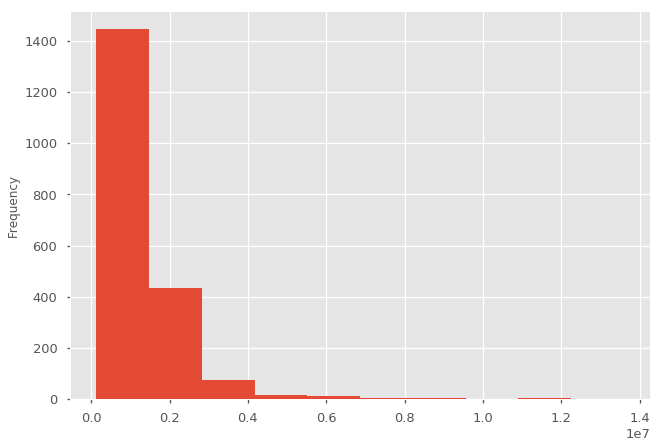

In [126]:
#Verificando a distribuição de preços
df["preco"].plot.hist() #Usando o encadeamento para fazer o plot como um histograma

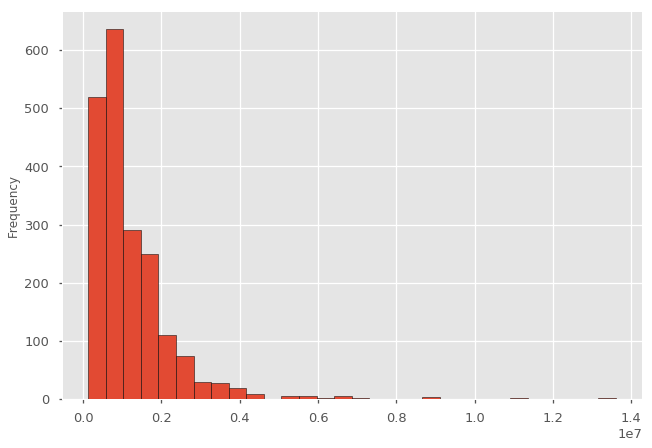

In [127]:
#Por padrão o metodo .hist() divide os dados em 10 partes (10 bins), mas é possivel alterar isso

df["preco"].plot.hist(bins=30, edgecolor ='black')

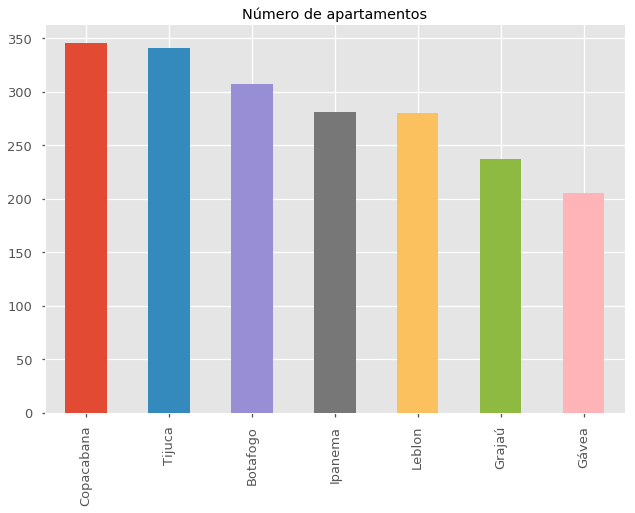

In [128]:
#Plot da contagem dos bairros
df["bairro"].value_counts().plot.bar(title = 'Número de apartamentos')

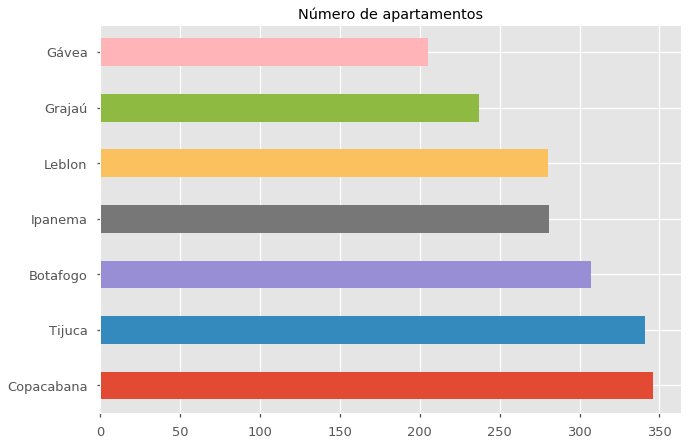

In [129]:
#ou
df["bairro"].value_counts().plot.barh(title = 'Número de apartamentos')

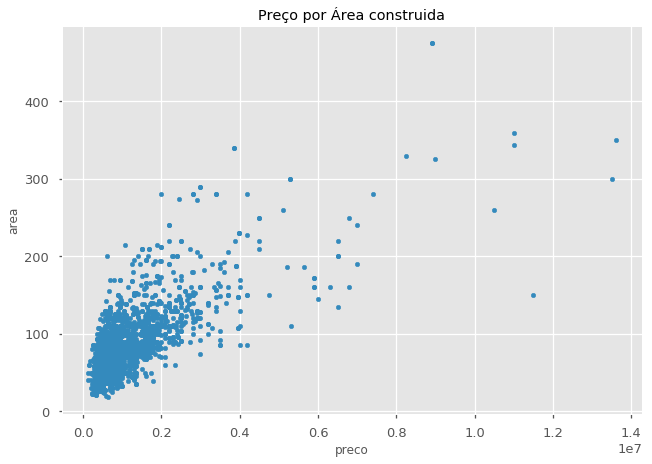

In [130]:
#graficos de dispersão com dataframes podem ser usados especificando os eixos x e y
df.plot.scatter(x='preco', y='area', title='Preço por Área construida')

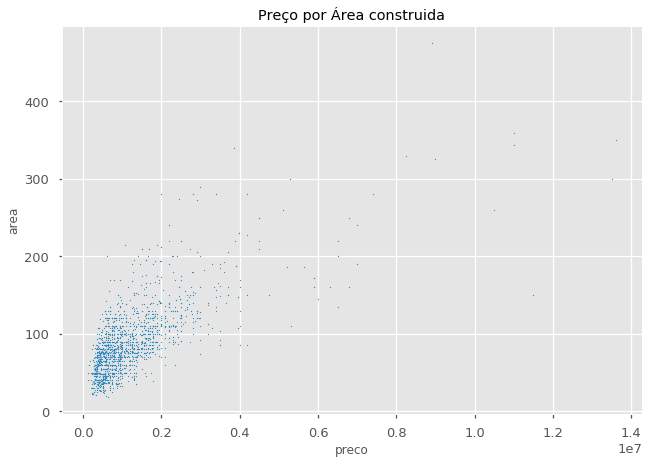

In [135]:
#Podemos diminuir a poluição no canto esquerdo do grafico acima, com a diminuição dos pontos
df.plot.scatter(x='preco', y='area', title='Preço por Área construida', s=.5)

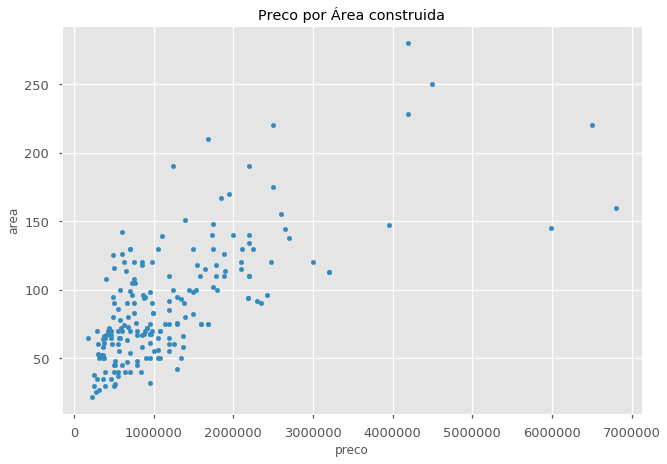

In [137]:
#Uma outra forma de diminuir a poluição é criando um amostragem aleatoria dos dados
df.sample(frac=.1).plot.scatter(x='preco', y='area', title='Preco por Área construida')

#Neste caso a amostra aleatória criada retorna 10% dos itens

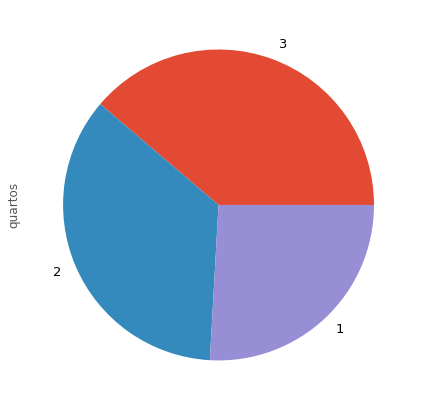

In [138]:
#Total de apartamentos divididos por quantidade de quartos
df["quartos"].value_counts().plot.pie()

# Salvando o Data Frame

In [140]:
df = pd.DataFrame({'Aluno' : ["Leandro", "Milton", "Patrick", "Ana", "Jessica"], 
                   'Faltas' : [3,4,2,1,4], 
                   'Prova' : [2,7,5,10,6], 
                   'Seminario' : [8.5,7.5,9.0,7.5,8.0]})

In [141]:
df.to_csv("aulas.csv")

In [142]:
pd.read_csv("aulas.csv")

Unnamed: 0    Aluno  Faltas  Prova  Seminario
0           0  Leandro       3      2        8.5
1           1   Milton       4      7        7.5
2           2  Patrick       2      5        9.0
3           3      Ana       1     10        7.5
4           4  Jessica       4      6        8.0